# The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet from this dataset: https://archive.ics.uci.edu/dataset/59/letter+recognition

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Feature selection


First, the dataset is loaded, and then it is split into test and train sets for further analysis.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
names = ['lettr',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/letter-recognition.data", names=names)

data.head(3)

lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     T      2      8      3     5      1      8     13      0      6      6   
1     I      5     12      3     7      2     10      5      5      4     13   
2     D      4     11      6     8      6     10      6      2      6     10   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

print(X.head(3))
print(y.head(3))

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      0      8      0      8  
1      9      2      8      4     10  
2      7      3      7      3      9  
0    T
1    I
2    D
Name: lettr, dtype: object


In [ ]:
data.isnull().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Basis function expansion

The "Degree=2" indicates that we want to create polynomial features up to the second degree.

With basis function expansion, we can proceed with training and evaluating the models using the expanded sets (X_train_expanded and X_test_expanded). However, this can significantly increase the dimensionality of the feature space, potentially leading to increased computational complexity. Therefore, the models will be trained on the original dataset to avoid this.


In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_train_expanded = poly_features.fit_transform(X_train)
X_test_expanded = poly_features.transform(X_test)

## Feature extraction

To transform data with t-SNE, the data must be numerical. Therefore, we first use LabelEncoder for this.

In [ ]:
encoder = LabelEncoder()

In [ ]:
copy = data

In [ ]:
copy['lettr'] = encoder.fit_transform(copy['lettr'])
copy

lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         19      2      8      3     5      1      8     13      0      6   
1          8      5     12      3     7      2     10      5      5      4   
2          3      4     11      6     8      6     10      6      2      6   
3         13      7     11      6     6      3      5      9      4      6   
4          6      2      1      3     1      1      8      6      6      6   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995      3      2      2      3     3      2      7      7      7      6   
19996      2      7     10      8     8      4      4      8      6      9   
19997     19      6      9      6     7      5      6     11      3      7   
19998     18      2      3      4     2      1      8      7      2      6   
19999      0      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0          6     10      8      0      8      0      8  
1         13      3      9      2      8      4     10  
2         10      3      7      3      7      3      9  
3          4      4     10      6     10      2      8  
4          6      5      9      1      7      5     10  
...      ...    ...    ...    ...    ...    ...    ...  
19995      6      6      4      2      8      3      7  
19996     12      9     13      2      9      3      7  
19997     11      9      5      2     12      2      4  
19998     10      6      8      1      9      5      8  
19999      8      1      8      2      7      2      8  

[20000 rows x 17 columns]

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a tool for visualizing high-dimensional data. It transforms the similarities between data points into joint probabilities and attempts to minimize the Kullback-Leibler divergence between the joint probabilities for low-dimensional embedding and high-dimensional data.

In [ ]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(copy)

## Visualization

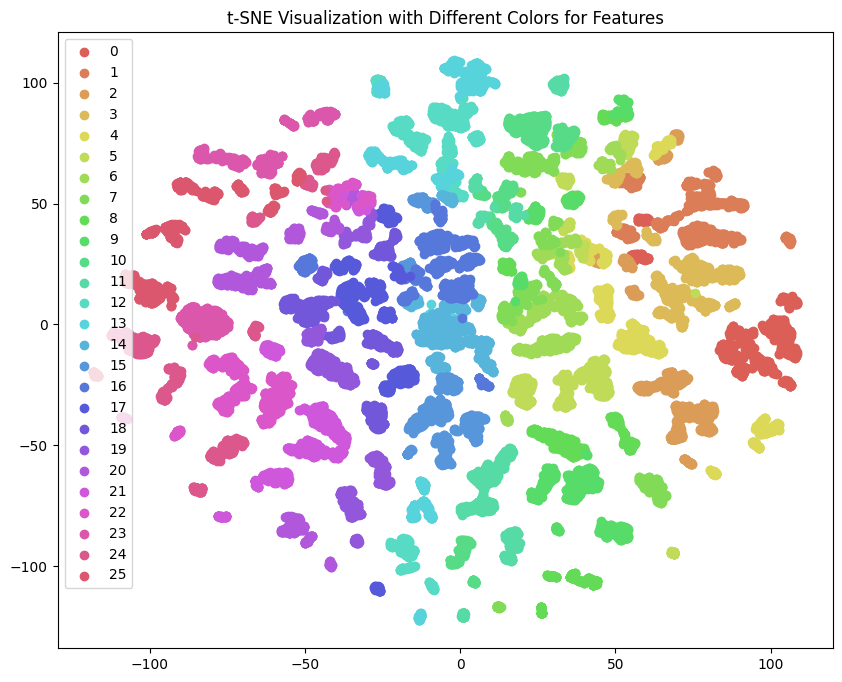

In [ ]:
color_palette = sns.color_palette("hls", np.unique(copy['lettr']).shape[0])

plt.figure(figsize=(10, 8))
for label in np.unique(copy['lettr']):
    indices = copy['lettr'] == label
    plt.scatter(tsne_data[indices, 0], tsne_data[indices, 1], color=color_palette[label], label=label)
plt.legend()
plt.title('t-SNE Visualization with Different Colors for Features')
plt.show()

Pairplot allows us to visualize the relationships between multiple variables in our dataset and provides a quick overview of the relationships and distributions between these variables.

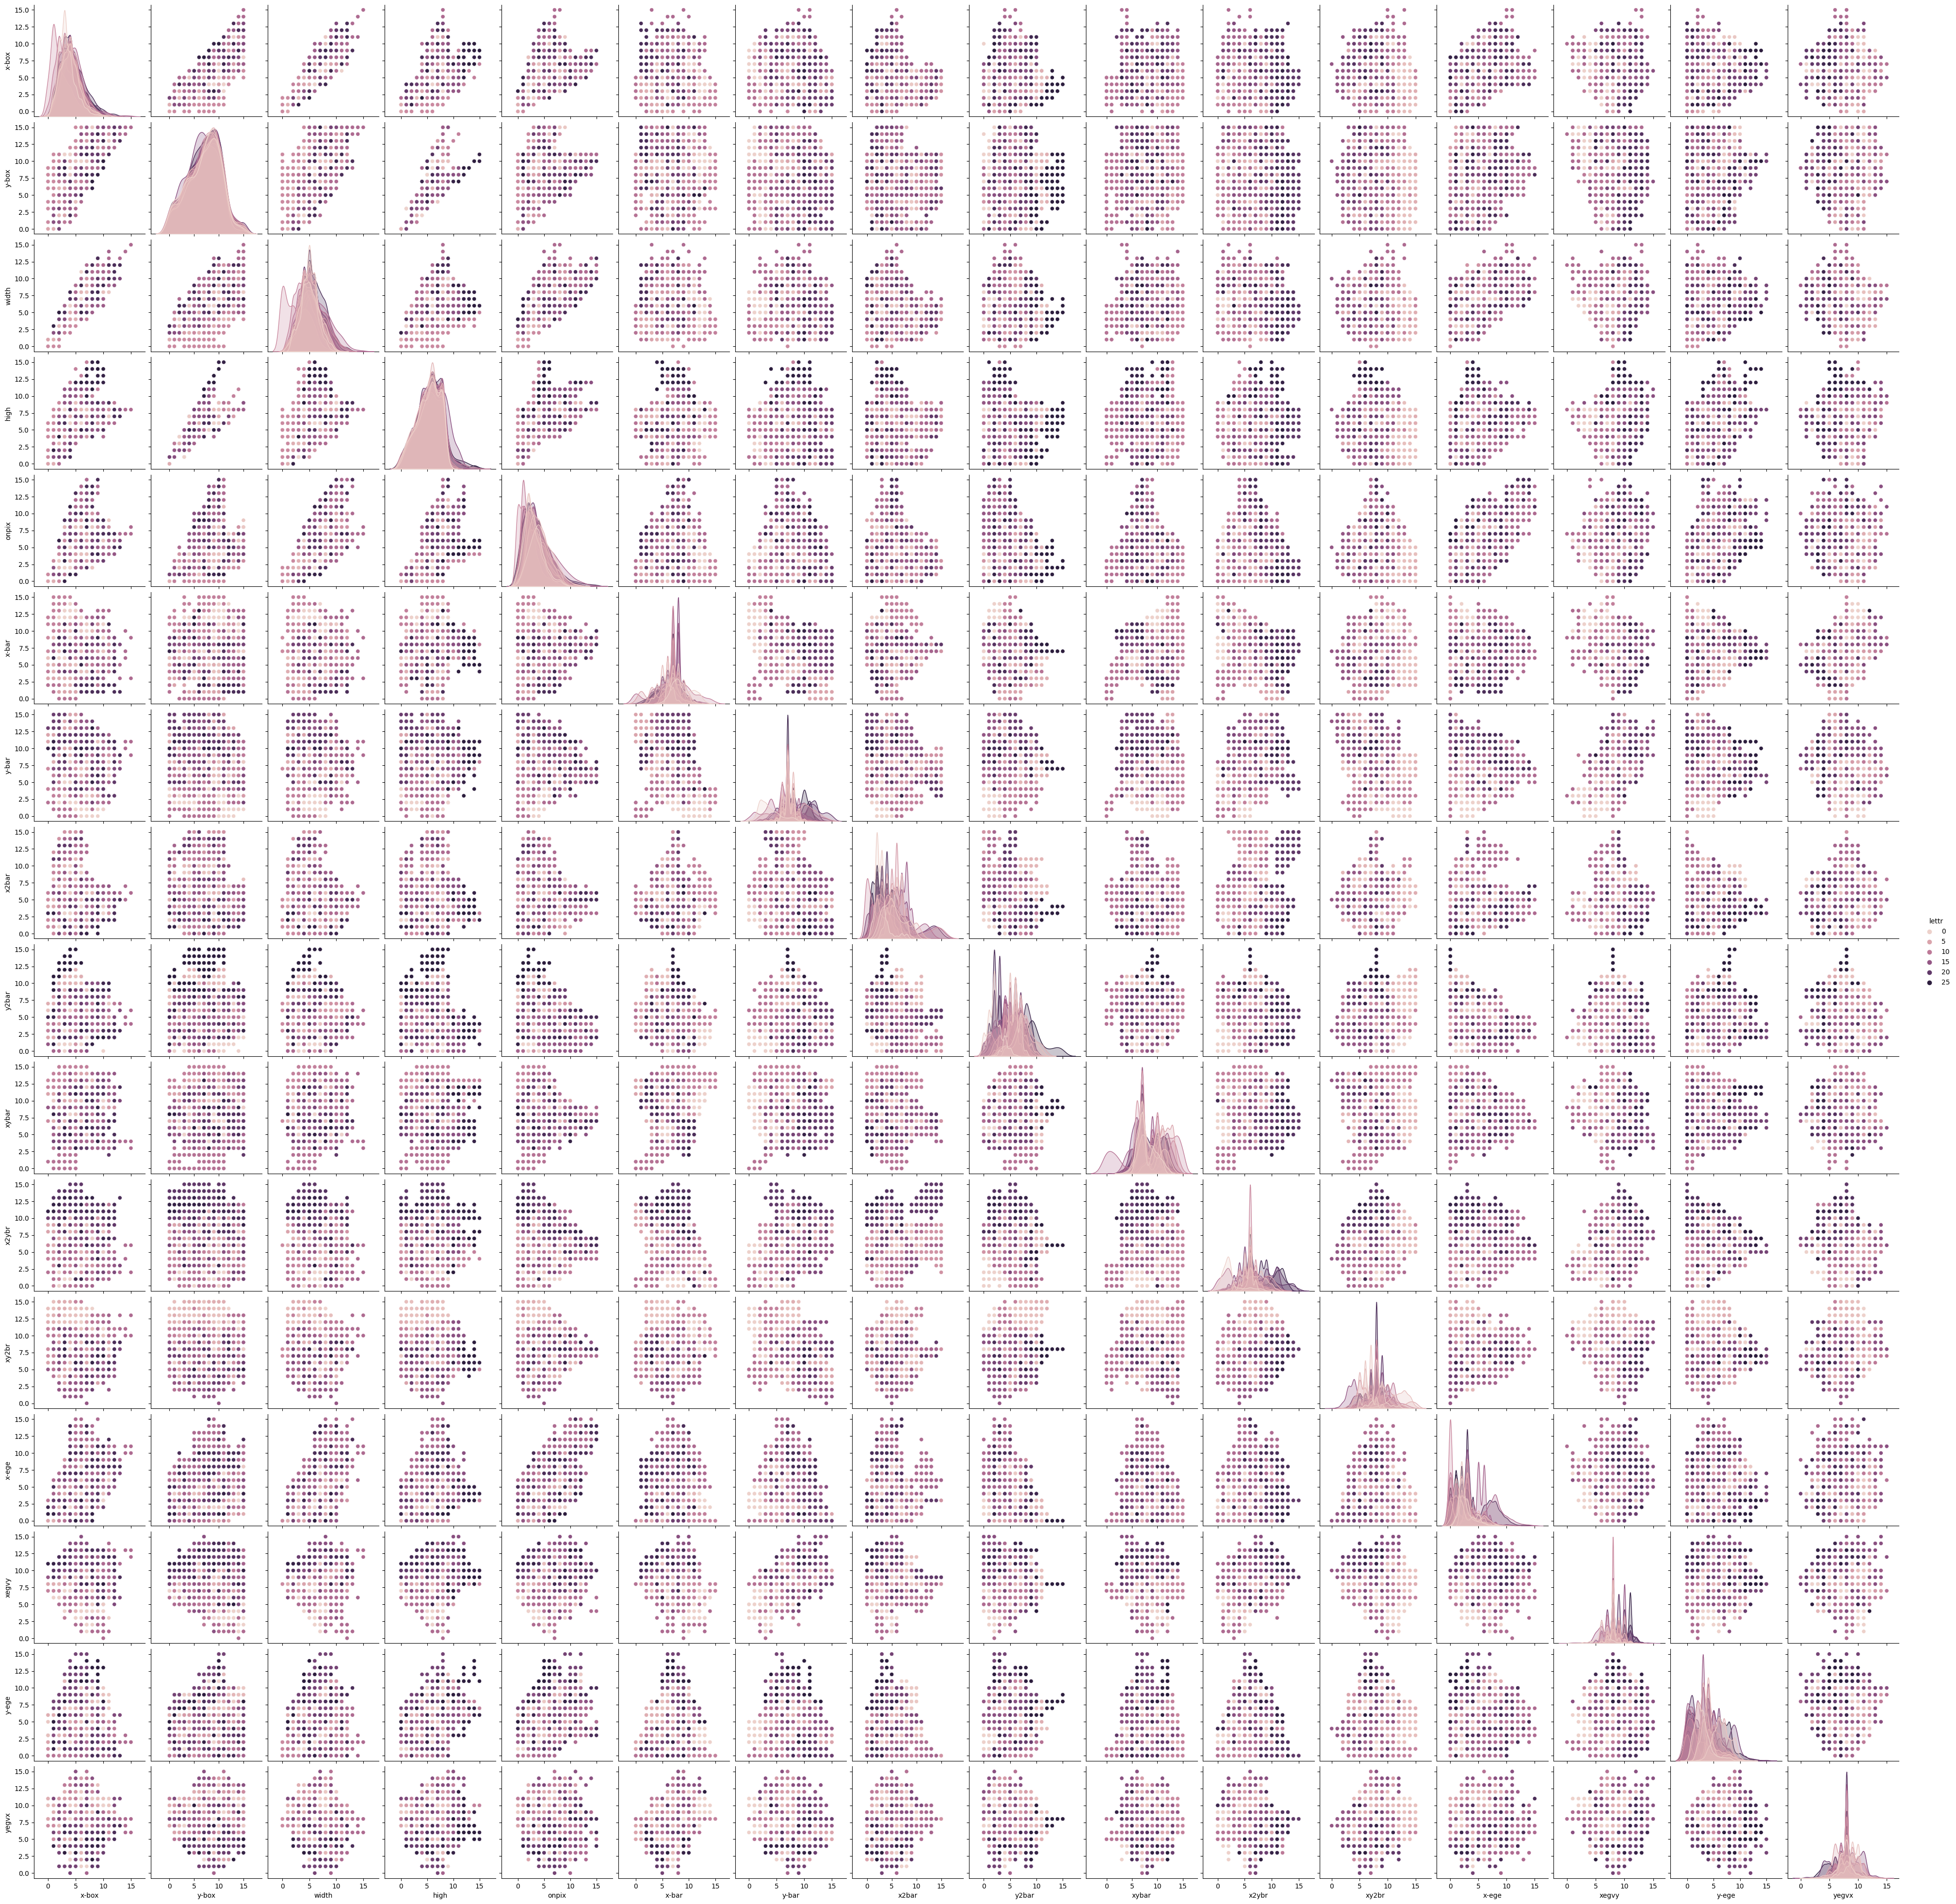

In [ ]:
sns.pairplot(data,hue='lettr')

## Classification models

### Support Vector Machines - SVМ

The key idea behind SVM (Support Vector Machine) is to find a hyperplane in the feature space that maximally separates different classes of data points. The hyperplane is selected in such a way that it maximizes the margin, which is the distance between the hyperplane and the closest data points from each class. These closest data points are called support vectors.

An instance of the SVC (Support Vector Classifier) classifier is initialized. By default, the SVC class uses the "rbf" (Radial Basis Function) kernel, which is suitable for non-linear classification.

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions, average='weighted')
svc_recall = recall_score(y_test, svc_predictions, average='weighted')

### Neural Networks

Since I don't have specific values specified, the alpha (regularization parameter added to the loss function to prevent overfitting) is set to 0.0001, and the maximum number of iterations is set to the default value of 200.

In [ ]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions, average='weighted')
nn_recall = recall_score(y_test, nn_predictions, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### XGBoost

XGBoost operates on the following principle:

1. Initialization:
  - It starts with a simple model that initially makes predictions based on the mean value of the target feature.
2. Training:
  - Iteratively and sequentially generates decision trees, where each tree is created to correct the errors of the previous tree.
3. Boosting:
  - In each iteration, it assigns weights to training samples based on the errors from previous iterations. Samples that were mispredicted receive higher weights, making them more important for the next iteration.
4. Regularization:
  - It uses L1 and L2 regularization to prevent overfitting, which means controlling the model's complexity through penalties for large parameter values.
5. Prediction:
  - Predictions from all the trees in the sequence are combined (summed) to obtain the final model prediction.

This combination of iterative training, ensemble learning, and regularization makes XGBoost an effective machine learning algorithm often used for classification and regression tasks.


In [ ]:
xgb_model = XGBClassifier()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')

### Random Forest

The Random Forest model operates on a similar principle to XGBoost, with the main difference being that instead of sequential processing, the trees work in parallel.

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')

### Evaluation scores

Accuracy еvaluation metric is the ratio of correctly predicted samples to the total number of samples.

Precision is a measurement that calculates the percentage of true positive predictions (correctly classified positive cases) among all positive predictions.

Recall, also known as sensitivity or true positive rate, measures the percentage of true positive predictions (correctly classified positive cases) among all actual positive instances.

In [ ]:
print("Support Vector Machines - SVC:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print()

print("Neural Networks:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print()

print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print()

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)


Support Vector Machines - SVC:
Accuracy: 0.95
Precision: 0.9521705274404791
Recall: 0.95

Neural Networks:
Accuracy: 0.95725
Precision: 0.9578580226387041
Recall: 0.95725

XGBoost:
Accuracy: 0.96225
Precision: 0.9627623383949871
Recall: 0.96225

Random Forest:
Accuracy: 0.962
Precision: 0.9631167401889767
Recall: 0.962


According to these metrics, the results seem to be great.